In [1]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filtered = pd.read_csv("Balancing->Filtering.csv",header=[0,1,2],index_col=0)
noisy = pd.read_csv("Imb X Clf-Noisy.csv",header=[0,1,2],index_col=0)
clean = pd.read_csv("Imb X Clf-Clean.csv",header=[0,1,2],index_col=0)
df =  clean - filtered
df.shape

(32, 52)

In [46]:
fil = filtered.drop(columns=['matthews_corrcoef'],level=2,axis=1).droplevel(2,axis=1) # matthews_corrcoef
noi = noisy.drop(columns=['matthews_corrcoef'],level=2,axis=1).droplevel(2,axis=1)
wilcoxon(fil.values.reshape(-1),noi.values.reshape(-1))

WilcoxonResult(statistic=65905.0, pvalue=4.5247961486642477e-54)

In [47]:
fil.values.mean(),noi.values.mean()

(0.4269872628654397, 0.41446840091250353)

In [48]:
clfs = set(list(zip(*fil.columns))[1])
clfs

{'LR',
 'RF',
 'bbag_DT',
 'bbag_NB',
 'dt',
 'knn',
 'lr',
 'nb',
 'rboost_DT',
 'rboost_NB',
 'rf'}

In [49]:
foo = fil.mean(level=1,axis=1)
noo = noi.mean(level=1,axis=1)
foo

clf,dt,lr,nb,knn,rf,rboost_DT,rboost_NB,bbag_DT,bbag_NB,LR,RF
activemq-5.8.0.csv,0.325833,0.308143,0.400120,0.279292,0.314454,0.291540,0.422511,0.308917,0.369669,0.312992,0.324907
groovy-1_6_BETA_1.csv,0.463648,0.411975,0.413429,0.474273,0.479664,0.494782,0.354196,0.482370,0.367682,0.439547,0.460462
activemq-5.3.0.csv,0.423339,0.472821,0.456055,0.437521,0.467364,0.424559,0.463937,0.466920,0.465350,0.448319,0.457997
wicket-1.3.0-incubating-beta-1.csv,0.416113,0.417175,0.462522,0.385653,0.323622,0.362980,0.406593,0.303972,0.419467,0.425163,0.379014
jruby-1.1.csv,0.552621,0.585422,0.603991,0.598780,0.608451,0.576163,0.565021,0.603928,0.639643,0.590367,0.630275
jruby-1.4.0.csv,0.525984,0.583372,0.599661,0.533590,0.582084,0.559842,0.519632,0.606833,0.615747,0.596860,0.569659
lucene-2.3.0.csv,0.629728,0.692825,0.614829,0.697214,0.745237,0.655459,0.656753,0.750621,0.620609,0.719866,0.762041
hbase-0.95.2.csv,0.456357,0.451219,0.515935,0.432015,0.469970,0.447674,0.491712,0.493902,0.529511,0.463548,0.452983
lucene-3.0.0.csv,0.408869,0.353409,0.328971,0.339978,0.306276,0.310294,0.343922,0.312275,0.315575,0.344261,0.279466
camel-2.9.0.csv,0.244771,0.240885,0.360141,0.279391,0.227275,0.265682,0.391194,0.221481,0.340957,0.271061,0.241290


In [50]:
for clf in clfs:
    f = foo.loc[:,clf]
    n = noo.loc[:,clf]
    print(clf,wilcoxon(f.values.reshape(-1),n.values.reshape(-1)).pvalue)

lr 0.0007631948858006922
nb 0.0047496512171545735
LR 0.25402170950909575
RF 0.018469615187117015
rboost_DT 1.702162849849115e-05
dt 7.952884142692727e-07
bbag_DT 1.6935305829217683e-06
knn 8.75128034540769e-07
bbag_NB 0.04153149119305514
rf 0.0019090783976280922
rboost_NB 0.0007631948858006922


In [93]:
mat = df.drop(columns=['pr_rec_score'],level=2,axis=1).droplevel(2,axis=1) #matthews_corrcoef,pr_rec_score
mat

imb                                    smote                                \
clf                                       dt        lr        nb       knn   
activemq-5.8.0.csv                 -0.001594  0.047590  0.007105  0.039575   
groovy-1_6_BETA_1.csv               0.053679  0.126488  0.036891  0.119512   
activemq-5.3.0.csv                 -0.012036 -0.002662 -0.005764 -0.068184   
wicket-1.3.0-incubating-beta-1.csv  0.057034  0.157098  0.031525  0.120962   
jruby-1.1.csv                       0.032781  0.012253  0.077007  0.052813   
jruby-1.4.0.csv                     0.097429  0.034822 -0.004029  0.085047   
lucene-2.3.0.csv                    0.190842  0.226757  0.142173  0.199773   
hbase-0.95.2.csv                    0.124193  0.206460  0.006795  0.122191   
lucene-3.0.0.csv                    0.110317  0.056057  0.013798  0.062117   
camel-2.9.0.csv                     0.038150  0.050273 -0.003615  0.034727   
wicket-1.5.3.csv                    0.070519  0.051095  0.035462  0.045540   
lucene-3.1.csv                     -0.031723 -0.011260 -0.014441  0.011528   
groovy-1_6_BETA_2.csv               0.104302  0.114587 -0.000625  0.057001   
activemq-5.2.0.csv                  0.115079  0.104246  0.035481  0.077016   
groovy-1_5_7.csv                    0.026387  0.081162  0.044754  0.099039   
hbase-0.95.0.csv                    0.252567  0.170913  0.034133  0.266137   
camel-2.11.0.csv                   -0.006841  0.062900  0.005102  0.039735   
jruby-1.7.0.preview1.csv            0.000489  0.074050  0.004321  0.072073   
hive-0.10.0.csv                     0.165387  0.169214 -0.000728  0.116415   
camel-2.10.0.csv                    0.037234  0.067345  0.019495  0.046447   
derby-10.2.1.6.csv                  0.228479  0.231131  0.103784  0.161962   
jruby-1.5.0.csv                     0.012011  0.097151  0.066315  0.151133   
derby-10.3.1.4.csv                  0.149615  0.090289  0.003378  0.134716   
lucene-2.9.0.csv                    0.084485  0.013806  0.000838  0.090705   
hbase-0.94.0.csv                    0.143414  0.114112  0.023180  0.073514   
camel-1.4.0.csv                     0.136401  0.119920  0.012719  0.116329   
activemq-5.1.0.csv                 -0.010352  0.046752 -0.001923  0.054971   
activemq-5.0.0.csv                  0.170718  0.142562  0.012862  0.071371   
derby-10.5.1.1.csv                  0.034786  0.051294 -0.012804 -0.000933   
wicket-1.3.0-beta2.csv             -0.011377  0.069791  0.023646  0.060757   
hive-0.12.0.csv                     0.280640  0.196177  0.085140  0.208914   
hive-0.9.0.csv                      0.269293  0.114396 -0.028504  0.191911   

imb                                                rus                      \
clf                                       rf        dt        lr        nb   
activemq-5.8.0.csv                  0.030661  0.020103  0.031122  0.017610   
groovy-1_6_BETA_1.csv               0.112833  0.070391  0.069504  0.032282   
activemq-5.3.0.csv                  0.014077 -0.000927  0.023674  0.005537   
wicket-1.3.0-incubating-beta-1.csv  0.124438  0.048112  0.100108  0.010833   
jruby-1.1.csv                       0.165207  0.015228  0.001258  0.093216   
jruby-1.4.0.csv                     0.088722  0.039483  0.017229 -0.004721   
lucene-2.3.0.csv                    0.163127  0.200345  0.203066  0.121816   
hbase-0.95.2.csv                    0.183346  0.060857  0.154446  0.012764   
lucene-3.0.0.csv                    0.158186  0.062704  0.026483  0.017337   
camel-2.9.0.csv                     0.054190  0.007093  0.042118  0.003061   
wicket-1.5.3.csv                    0.049748 -0.017426  0.033349  0.033876   
lucene-3.1.csv                      0.000461 -0.002746  0.003010 -0.014384   
groovy-1_6_BETA_2.csv               0.112906  0.091897  0.103888 -0.000887   
activemq-5.2.0.csv                  0.155236  0.085914  0.058911  0.016991   
groovy-1_5_7.csv                   -0.038044 -0.022141  0.030980 -0.003424   
hbase-0.95.0.csv     

In [94]:
rank = mat.copy()
for d in mat.index:
    rank.loc[d] = rankdata(mat.loc[d])
rank

imb                                smote                           rus        \
clf                                   dt    lr    nb   knn    rf    dt    lr   
activemq-5.8.0.csv                   2.0  20.0   8.0  17.0  13.0  11.0  14.0   
groovy-1_6_BETA_1.csv               10.0  26.0   9.0  25.0  23.0  15.0  14.0   
activemq-5.3.0.csv                   4.0   7.0   5.0   1.0  14.0   8.0  20.0   
wicket-1.3.0-incubating-beta-1.csv   8.0  25.0   5.0  19.0  22.0   7.0  15.0   
jruby-1.1.csv                        5.0   3.0  14.0   7.0  24.0   4.0   1.0   
jruby-1.4.0.csv                     25.0  12.0   4.0  21.0  22.0  13.0   8.0   
lucene-2.3.0.csv                    17.0  24.0   9.0  19.0  12.0  20.0  21.0   
hbase-0.95.2.csv                    13.0  22.0   3.0  12.0  20.0   6.0  18.0   
lucene-3.0.0.csv                    19.0  13.0   3.0  14.0  24.0  15.0   8.0   
camel-2.9.0.csv                     15.0  18.0   2.0  14.0  19.0   7.0  17.0   
wicket-1.5.3.csv                    22.0  19.0  15.0  17.0  18.0   2.0  12.0   
lucene-3.1.csv                       6.0  17.0  14.0  23.0  20.0  19.0  22.0   
groovy-1_6_BETA_2.csv               15.0  20.0   7.0  10.0  18.0  12.0  14.0   
activemq-5.2.0.csv                  14.0  12.0   3.0   8.0  20.0   9.0   5.0   
groovy-1_5_7.csv                    11.0  21.0  16.0  23.0   5.0   6.0  13.0   
hbase-0.95.0.csv                    19.0   9.0   5.0  20.0  24.0  10.0   7.0   
camel-2.11.0.csv                     4.0  23.0  10.0  21.0   5.0  16.0  20.0   
jruby-1.7.0.preview1.csv             5.0  24.0   7.0  23.0   2.0  26.0  20.0   
hive-0.10.0.csv                     14.0  15.0   1.0  13.0  23.0   9.0  10.0   
camel-2.10.0.csv                    13.0  24.0   6.0  19.0  22.0   4.0  18.0   
derby-10.2.1.6.csv                  18.0  19.0   4.0  10.0  21.0   7.0  15.0   
jruby-1.5.0.csv                      3.0  17.0  12.0  22.0  23.0  10.0  11.0   
derby-10.3.1.4.csv                  16.0   7.0   2.0  13.0  21.0  10.0   8.0   
lucene-2.9.0.csv                    22.0  12.0   7.0  23.0  24.0  10.0   6.0   
hbase-0.94.0.csv                    17.0  14.0   5.0   9.0  21.0   7.0  15.0   
camel-1.4.0.csv                     26.0  24.0   5.0  23.0  25.0  11.0  16.0   
activemq-5.1.0.csv                   6.0  24.0  11.0  25.0  21.0  15.0  17.0   
activemq-5.0.0.csv                  18.0  16.0   2.0   7.0  20.0   9.0  13.0   
derby-10.5.1.1.csv                  15.0  19.0   5.0   7.0  20.0   9.0  17.0   
wicket-1.3.0-beta2.csv               3.0  26.0  15.0  22.0  13.0  12.0  23.0   
hive-0.12.0.csv                     21.0  14.0   3.0  16.0  26.0   8.0  10.0   
hive-0.9.0.csv                      19.0  10.0   2.0  17.0  21.0   8.0   9.0   

imb                                                   ... tomek              \
clf                                   nb   knn    rf  ...    lr    nb   knn   
activemq-5.8.0.csv                  10.0  18.0  19.0  ...  24.0   5.0  15.0   
groovy-1_6_BETA_1.csv                7.0  18.0  17.0  ...   8.0   2.0  11.0   
activemq-5.3.0.csv                  12.0   2.0  13.0  ...  24.0  15.0  22.0   
wicket-1.3.0-incubating-beta-1.csv   1.0  11.0  12.0  ...   9.0   2.0  21.0   
jruby-1.1.csv                       18.0  15.0   6.0  ...  20.0  10.0  23.0   
jruby-1.4.0.csv                      3.0  20.0  17.0  ...   6.0   2.0  10.0   
lucene-2.3.0.csv                     6.0   7.0  11.0  ...  15.0  16.0  14.0   
hbase-0.95.2.csv                     4.0  19.0  14.0  ...  25.0   5.0  21.0   
lucene-3.0.0.csv                     4.0  16.0  11.0  ...  23.0   2.0  22.0   
camel-2.9.0.csv                      5.0  10.0  11.0  ...  23.0   1.0  24.0   
wicket-1.5.3.csv                    14.0   8.0   6.0  ...  26.0   4.0  23.0   
lucene-3.1.csv                      15.0   5.0  24.0  ...  16.0  12.0   1.0   
groovy-1_6_BETA_2.csv                6.0  13.0  23.0  ...  22.0   4.0   2.0   
activemq-5.2.0.csv                   2.0  10.0  13.0  ...  23.0   6.0  18.0   
groovy-1_5_7.cs

In [95]:
rank.mean().sort_values()

imb     clf      
wilson  nb            5.43750
tomek   nb            5.87500
ens     rboost_NB     6.25000
        bbag_NB       6.40625
rus     nb            6.62500
smote   nb            6.84375
rus     dt           10.46875
ens     bbag_DT      12.31250
rus     knn          13.06250
smote   dt           13.28125
wilson  dt           13.53125
rus     lr           13.65625
tomek   dt           14.06250
rus     rf           14.28125
ens     rboost_DT    14.68750
wilson  lr           15.18750
smote   knn          16.25000
wilson  knn          16.62500
tomek   knn          16.81250
sim     LR           17.00000
tomek   lr           17.03125
smote   lr           17.37500
        rf           18.93750
wilson  rf           19.53125
sim     RF           19.71875
tomek   rf           19.75000
dtype: float64

In [23]:
rank.mean(level=0,axis=1)

NameError: name 'rank' is not defined

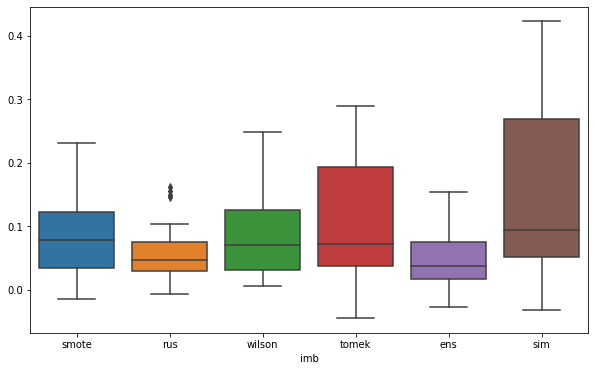

In [97]:
plt.figure(figsize=(10,6))
f = sns.boxplot(data=mat.mean(level=0,axis=1));
#f.get_figure().savefig("figures/bal->filter_imb.svg",format='svg');

In [98]:
rank.mean(level=1,axis=1).mean()

clf
dt           12.835938
lr           15.812500
nb            6.195312
knn          15.687500
rf           18.125000
rboost_DT    14.687500
rboost_NB     6.250000
bbag_DT      12.312500
bbag_NB       6.406250
LR           17.000000
RF           19.718750
dtype: float64

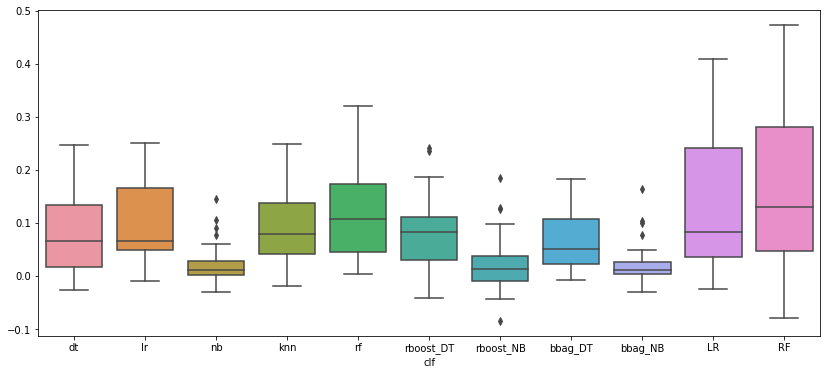

In [99]:
plt.figure(figsize=(14,6))
f = sns.boxplot(data=mat.mean(level=1,axis=1))

In [100]:
f.get_figure().savefig("figures/Clean-filtering.svg",format='svg');